# 追加MFCC通道的ResNet 18声音识别

In [151]:
import os.path
from torch.utils.data import DataLoader
from serina import TrainSet, waveform_to_spectrogram, get_categories, SoundDataset
import torchaudio.transforms as AT
import torchvision.transforms as VT
import librosa
from matplotlib import pyplot as plt

train_set = TrainSet()
train_loader = DataLoader(train_set, shuffle=True, batch_size=64)

Its 3 channels.

In [152]:
tensor, _, _ = train_set.get_item_with_file_path(2)
tensor.shape

torch.Size([3, 224, 224])

## 将数据集划分为RGB+MFCC

Parsing /Volumes/PData/AI/Projects/serina/ESC-50/audio/2-160888-A-47.wav.
category: airplane,  mfcc tensor shape is torch.Size([13, 1376])


/Volumes/PData/AI/Conda/anaconda3/envs/serina/lib/python3.11/site-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


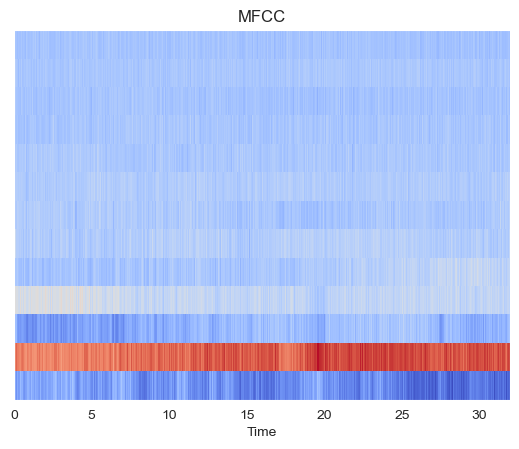

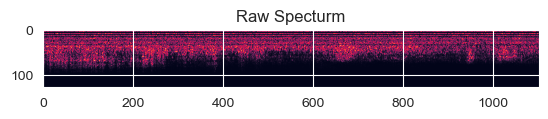

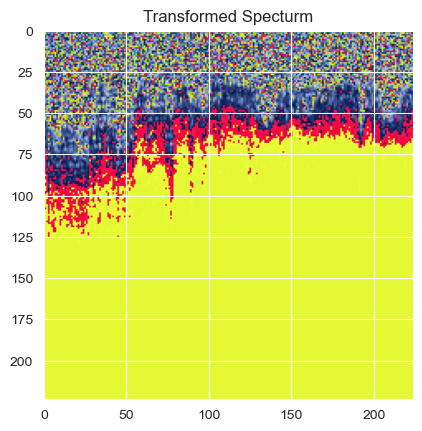

In [153]:


def get_mfcc(waveform, sample_rate):
    mfcc_transform = AT.MFCC(
        sample_rate=sample_rate,
        n_mfcc=13,  # 通常选择的MFCC数量
        melkwargs={"n_fft": 400, "hop_length": 160, "n_mels": 23, "center": False}
    )
    # 应用MFCC变换
    return mfcc_transform(waveform)


def waveform_to_mel_spectrogram(waveform, sample_rate):
    # 转换为梅尔频谱图
    spectrogram_transform = AT.MelSpectrogram(sample_rate=sample_rate)
    mel_spectrogram = spectrogram_transform(waveform)
    return mel_spectrogram


def test(item: int):
    waveform, sample_rate, file_path, category = train_set.get_raw_info(item)

    mfcc_tensor = get_mfcc(waveform, sample_rate).squeeze()
    print(f"Parsing {os.path.abspath(file_path)}.")
    print(f"category: {category},  mfcc tensor shape is {mfcc_tensor.shape}")

    fig, ax1 = plt.subplots()
    librosa.display.specshow(mfcc_tensor.numpy(), x_axis='time', ax=ax1)
    # fig.colorbar()
    ax1.set_title('MFCC')
    # ax1.tight_layout()

    raw_tensor, sample_rate, _, _ = train_set.get_raw_info(item)
    fig, ax2 = plt.subplots()
    ax2.set_title("Raw Specturm")
    m = waveform_to_mel_spectrogram(raw_tensor, sample_rate)
    ax2.imshow(VT.ToPILImage()(m))

    trans_tensor, _ = train_set[item]
    fig, ax3 = plt.subplots()
    ax3.set_title("Transformed Specturm")
    ax3.imshow(VT.ToPILImage()(trans_tensor))

    plt.show()


test(10)